# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:31:49.694513: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:31:49.721665: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:31:50.157045: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "NEGATIVITY"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:31:51.136557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:31:51.158688: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395511.770031  219973 service.cc:145] XLA service 0x770cd4003dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395511.770050  219973 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:31:51.782379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:31:51.853970: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:48 1s/step - accuracy: 0.5938 - loss: 0.6950

102/150 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.6600 - loss: 0.6335

I0000 00:00:1716395512.425246  219973 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6689 - loss: 0.6166 - val_accuracy: 0.8283 - val_loss: 0.4287


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7812 - loss: 0.4494

115/150 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8746 - loss: 0.3412

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8827 - loss: 0.3242 - val_accuracy: 0.9450 - val_loss: 0.1801


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.1207

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9580 - loss: 0.1410

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9588 - loss: 0.1390 - val_accuracy: 0.9667 - val_loss: 0.1212


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0720

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9753 - loss: 0.0861

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9752 - loss: 0.0873 - val_accuracy: 0.9692 - val_loss: 0.1057


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.4403

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9745 - loss: 0.0975

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9751 - loss: 0.0953 - val_accuracy: 0.9825 - val_loss: 0.0934


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0254

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9835 - loss: 0.0671

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9830 - loss: 0.0698 - val_accuracy: 0.9775 - val_loss: 0.0926


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0746

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9820 - loss: 0.0813

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9820 - loss: 0.0805 - val_accuracy: 0.9825 - val_loss: 0.0837


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0098

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9859 - loss: 0.0747

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9857 - loss: 0.0741 - val_accuracy: 0.9825 - val_loss: 0.0807


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0339

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9904 - loss: 0.0507

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9897 - loss: 0.0531 - val_accuracy: 0.9867 - val_loss: 0.0809


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0130

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9903 - loss: 0.0423

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9897 - loss: 0.0459 - val_accuracy: 0.9858 - val_loss: 0.0770


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0529

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9878 - loss: 0.0500

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9877 - loss: 0.0509 - val_accuracy: 0.9825 - val_loss: 0.0750


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0708

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.9872 - loss: 0.0553

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9873 - loss: 0.0553 - val_accuracy: 0.9858 - val_loss: 0.0700


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0687

145/150 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.9876 - loss: 0.0514

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.9876 - loss: 0.0514 - val_accuracy: 0.9900 - val_loss: 0.0730


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0441

113/150 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9892 - loss: 0.0415

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9893 - loss: 0.0425 - val_accuracy: 0.9883 - val_loss: 0.0675


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0087

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9895 - loss: 0.0430

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9900 - loss: 0.0428 - val_accuracy: 0.9900 - val_loss: 0.0639


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0139

144/150 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9907 - loss: 0.0401

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.9908 - loss: 0.0400 - val_accuracy: 0.9867 - val_loss: 0.0665


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0049

143/150 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9953 - loss: 0.0238

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9952 - loss: 0.0243 - val_accuracy: 0.9900 - val_loss: 0.0587


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1966

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9929 - loss: 0.0343

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9932 - loss: 0.0333 - val_accuracy: 0.9892 - val_loss: 0.0592


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0228

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9932 - loss: 0.0287

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9932 - loss: 0.0290 - val_accuracy: 0.9908 - val_loss: 0.0608


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0117

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9943 - loss: 0.0310

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9943 - loss: 0.0304 - val_accuracy: 0.9925 - val_loss: 0.0556


2024/05/22 18:31:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0121

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9896 - loss: 0.0550


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/22 18:31:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 5


Model saved in run 473124d5aa75431cb47565be9bc2100e


Created version '5' of model 'QuantumStateClassifier-CONCURRENCE'.


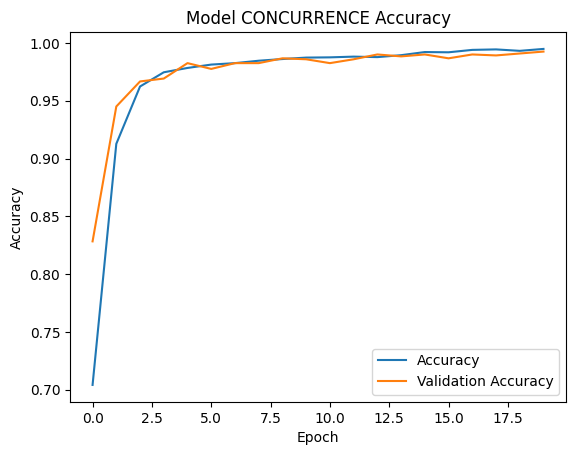

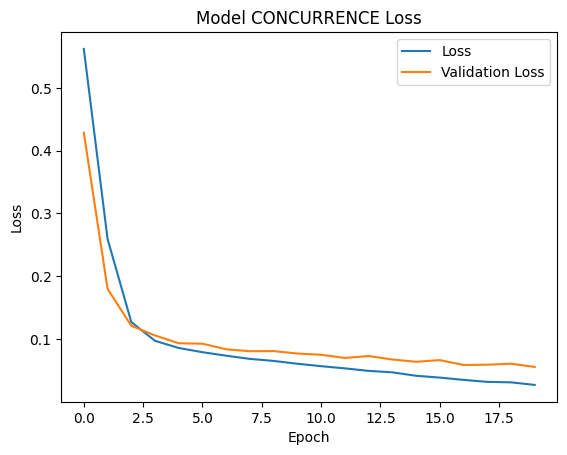

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:27 585ms/step - accuracy: 0.7188 - loss: 0.6750

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.6689 - loss: 0.6215  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6739 - loss: 0.6127 - val_accuracy: 0.8400 - val_loss: 0.3850


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.2756

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8882 - loss: 0.3049

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8934 - loss: 0.2931 - val_accuracy: 0.9567 - val_loss: 0.1356


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1200

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9629 - loss: 0.1245

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9632 - loss: 0.1232 - val_accuracy: 0.9783 - val_loss: 0.0767


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1010

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9797 - loss: 0.0688

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9797 - loss: 0.0683 - val_accuracy: 0.9867 - val_loss: 0.0531


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0246

146/150 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9870 - loss: 0.0473

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9869 - loss: 0.0473 - val_accuracy: 0.9875 - val_loss: 0.0376


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0250

145/150 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.9858 - loss: 0.0409

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9858 - loss: 0.0407 - val_accuracy: 0.9933 - val_loss: 0.0292


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.0923

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9892 - loss: 0.0338

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9925 - val_loss: 0.0246


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0120

116/150 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.9943 - loss: 0.0218

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9939 - loss: 0.0222 - val_accuracy: 0.9942 - val_loss: 0.0216


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0269

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9951 - loss: 0.0162

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9925 - val_loss: 0.0207


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0059

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9948 - loss: 0.0157

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9958 - val_loss: 0.0134


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0056

107/150 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9985 - loss: 0.0083

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9980 - loss: 0.0093 - val_accuracy: 0.9958 - val_loss: 0.0116


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0166

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9959 - loss: 0.0139

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9960 - loss: 0.0135 - val_accuracy: 0.9950 - val_loss: 0.0107


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0012

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9976 - loss: 0.0080

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9967 - val_loss: 0.0121


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0503

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9979 - loss: 0.0089

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9979 - loss: 0.0087 - val_accuracy: 0.9975 - val_loss: 0.0077


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0011

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9979 - loss: 0.0078

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9975 - val_loss: 0.0067


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0047

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9984 - loss: 0.0066

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9958 - val_loss: 0.0076


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0030

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.9992 - loss: 0.0051

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9992 - loss: 0.0052 - val_accuracy: 0.9992 - val_loss: 0.0065


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0077

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9995 - loss: 0.0042

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0046


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0033

 88/150 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9992 - loss: 0.0033

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0038


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0107

101/150 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 1.0000 - loss: 0.0024

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9992 - val_loss: 0.0052


2024/05/22 18:31:59 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0021

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9992 - loss: 0.0051


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/22 18:32:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 5


Model saved in run 152fa97e21bc488d9245e2a8914b2ce6


Created version '5' of model 'QuantumStateClassifier-ENTROPY'.


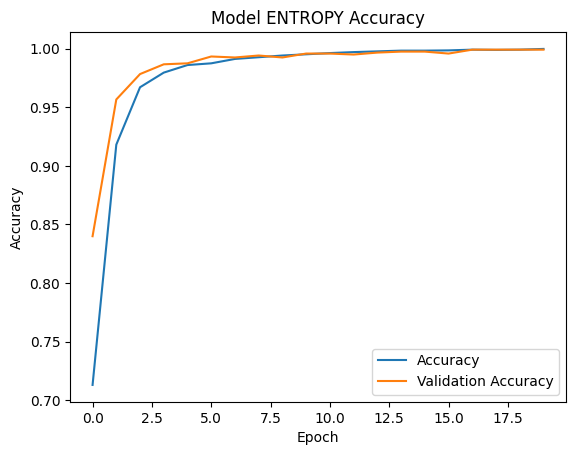

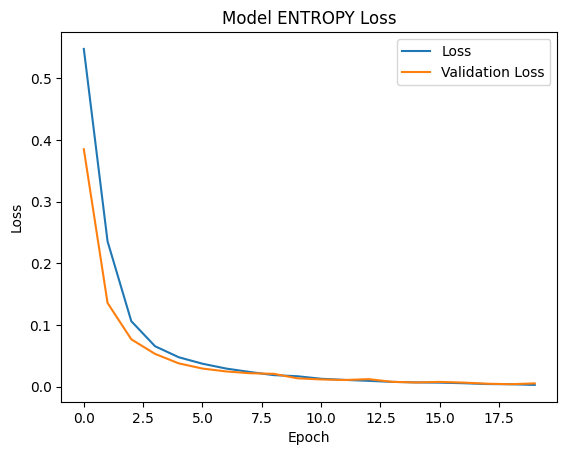

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:28 595ms/step - accuracy: 0.4375 - loss: 0.6945

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.6267 - loss: 0.6262  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6370 - loss: 0.6168 - val_accuracy: 0.8833 - val_loss: 0.3538


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8750 - loss: 0.3368

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9016 - loss: 0.2934

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.9065 - loss: 0.2811 - val_accuracy: 0.9583 - val_loss: 0.1237


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0977

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9616 - loss: 0.1137

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9623 - loss: 0.1122 - val_accuracy: 0.9725 - val_loss: 0.0735


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.1610

145/150 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.9798 - loss: 0.0666

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9799 - loss: 0.0666 - val_accuracy: 0.9783 - val_loss: 0.0532


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0141

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9862 - loss: 0.0442

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9860 - loss: 0.0448 - val_accuracy: 0.9892 - val_loss: 0.0410


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0152

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9906 - loss: 0.0330

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9902 - loss: 0.0340 - val_accuracy: 0.9925 - val_loss: 0.0329


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0228

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9910 - loss: 0.0325

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9908 - loss: 0.0325 - val_accuracy: 0.9933 - val_loss: 0.0316


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0213

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9917 - loss: 0.0273

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9942 - val_loss: 0.0219


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0055

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9949 - loss: 0.0219

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9947 - loss: 0.0220 - val_accuracy: 0.9942 - val_loss: 0.0203


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0045

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9946 - loss: 0.0241

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9946 - loss: 0.0236 - val_accuracy: 0.9942 - val_loss: 0.0164


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0069

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9942 - loss: 0.0206

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9943 - loss: 0.0203 - val_accuracy: 0.9950 - val_loss: 0.0159


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0181

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9927 - loss: 0.0221

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9932 - loss: 0.0213 - val_accuracy: 0.9942 - val_loss: 0.0138


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0227

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.9964 - loss: 0.0140

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9963 - loss: 0.0142 - val_accuracy: 0.9958 - val_loss: 0.0123


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0046

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.9969 - loss: 0.0126

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9968 - loss: 0.0128 - val_accuracy: 0.9942 - val_loss: 0.0126


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0018

108/150 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.9973 - loss: 0.0105

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9972 - loss: 0.0112 - val_accuracy: 0.9950 - val_loss: 0.0110


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0031

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9982 - loss: 0.0088

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9980 - loss: 0.0092 - val_accuracy: 0.9975 - val_loss: 0.0124


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0084

143/150 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9971 - loss: 0.0106

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9971 - loss: 0.0106 - val_accuracy: 0.9967 - val_loss: 0.0089


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0040

142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9966 - loss: 0.0118

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.9966 - loss: 0.0116 - val_accuracy: 0.9958 - val_loss: 0.0111


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0094

146/150 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.9974 - loss: 0.0092

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9974 - loss: 0.0093 - val_accuracy: 0.9958 - val_loss: 0.0084


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0011

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9977 - loss: 0.0081

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9967 - val_loss: 0.0091


2024/05/22 18:32:04 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0033

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9968 - loss: 0.0095


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/22 18:32:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 5


Model saved in run a82bde98c1734ae4a632599805a50b50


Created version '5' of model 'QuantumStateClassifier-NEGATIVITY'.


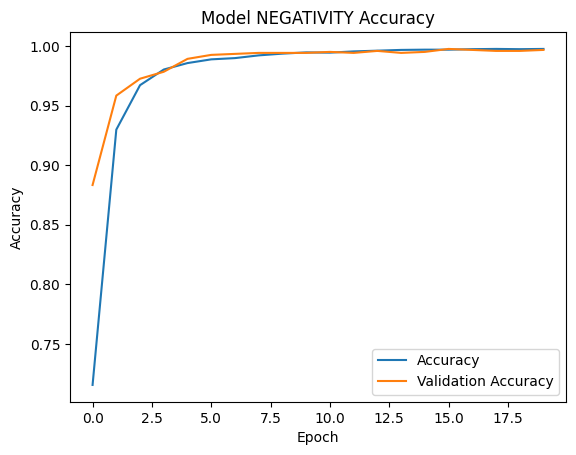

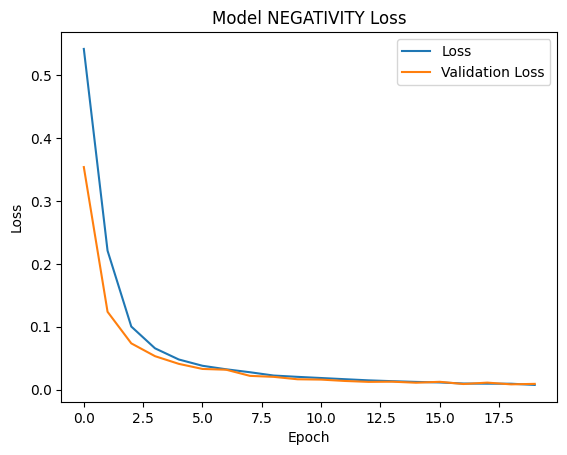

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:26 581ms/step - accuracy: 0.3750 - loss: 0.7081

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.7072 - loss: 0.5912  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7108 - loss: 0.5843 - val_accuracy: 0.7567 - val_loss: 0.4631


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8750 - loss: 0.3658

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7867 - loss: 0.4266

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.7938 - loss: 0.4207 - val_accuracy: 0.8708 - val_loss: 0.3483


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8438 - loss: 0.4256

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8912 - loss: 0.3204

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8916 - loss: 0.3157 - val_accuracy: 0.8592 - val_loss: 0.2768


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.1413

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9059 - loss: 0.2411

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9063 - loss: 0.2396 - val_accuracy: 0.9158 - val_loss: 0.2047


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2295

116/150 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9417 - loss: 0.1825

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9418 - loss: 0.1810 - val_accuracy: 0.9483 - val_loss: 0.1549


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1265

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9630 - loss: 0.1335

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9627 - loss: 0.1339 - val_accuracy: 0.9408 - val_loss: 0.1394


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1625

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9713 - loss: 0.1193

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9712 - loss: 0.1177 - val_accuracy: 0.9642 - val_loss: 0.1088


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0590

113/150 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9746 - loss: 0.0951

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9746 - loss: 0.0946 - val_accuracy: 0.9733 - val_loss: 0.0948


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0921

114/150 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9826 - loss: 0.0847

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9815 - loss: 0.0841 - val_accuracy: 0.9817 - val_loss: 0.0862


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0563

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.9764 - loss: 0.0769

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9762 - loss: 0.0773 - val_accuracy: 0.9725 - val_loss: 0.0851


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0337

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9828 - loss: 0.0684

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9826 - loss: 0.0683 - val_accuracy: 0.9767 - val_loss: 0.0726


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0530

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9790 - loss: 0.0652

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9788 - loss: 0.0654 - val_accuracy: 0.9800 - val_loss: 0.0708


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0698

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9836 - loss: 0.0619

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9832 - loss: 0.0619 - val_accuracy: 0.9650 - val_loss: 0.0827


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0425

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9771 - loss: 0.0651

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.9773 - loss: 0.0647 - val_accuracy: 0.9700 - val_loss: 0.0744


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0510

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9873 - loss: 0.0530

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9868 - loss: 0.0531 - val_accuracy: 0.9767 - val_loss: 0.0662


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.0772

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9817 - loss: 0.0564

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9820 - loss: 0.0560 - val_accuracy: 0.9700 - val_loss: 0.0701


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0166

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9809 - loss: 0.0530

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9811 - loss: 0.0531 - val_accuracy: 0.9767 - val_loss: 0.0615


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0403

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9884 - loss: 0.0465

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9880 - loss: 0.0470 - val_accuracy: 0.9767 - val_loss: 0.0652


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0310

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9846 - loss: 0.0453

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9844 - loss: 0.0456 - val_accuracy: 0.9767 - val_loss: 0.0563


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0380

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9830 - loss: 0.0486

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9831 - loss: 0.0486 - val_accuracy: 0.9883 - val_loss: 0.0511


2024/05/22 18:32:09 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0635

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9880 - loss: 0.0603


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/22 18:32:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 5


Model saved in run c5351b8bbbd54df184b242242d3c8754


Created version '5' of model 'QuantumStateClassifier-CHSH'.


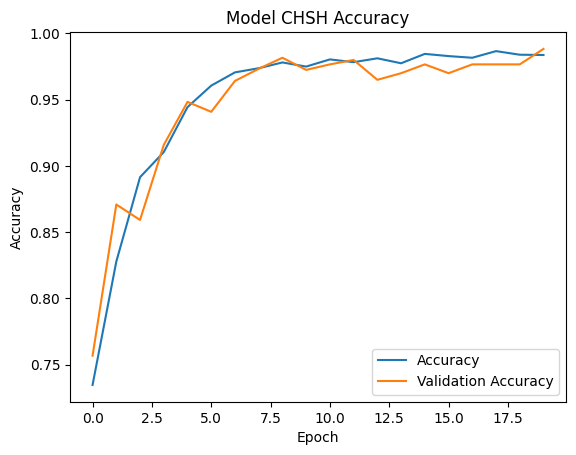

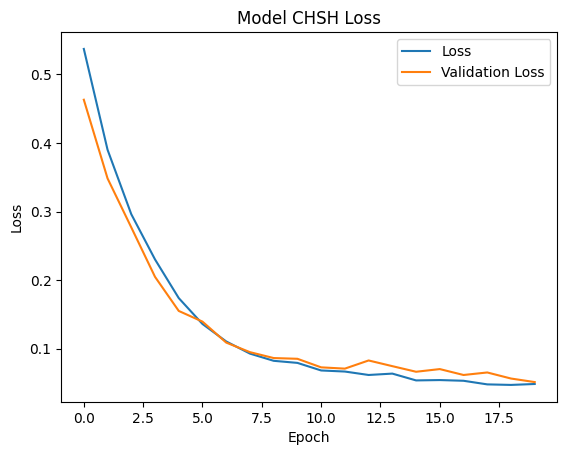

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
